Install Google Cloud Bigquery (API to connect to Google Big Query) and Pandas GBQ (for querying into Pandas Dataframe)

In [ ]:
#pip install --upgrade google-cloud-bigquery[pandas]
#pip install --user pandas-gbq -U

Import Required Libraries

In [1]:
from google.cloud import bigquery
import pandas as pd
import pandas_gbq

Set Environment variable for Google Credentials

In [2]:
import os
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = os.getcwd() + "/Key.json"

Create Big Query Client

In [3]:
bg_client = bigquery.Client(project='bigquery-public-data')

Get the data set and display all the tables from the given dataset

In [4]:
data_set_ref = bg_client.dataset('chicago_taxi_trips', project='bigquery-public-data')
data_set = bg_client.get_dataset(data_set_ref)
for tab in bg_client.list_tables(data_set):
    print(tab.table_id)

taxi_trips


List all the columns and the corresponding details for the given table

In [5]:
tab = bg_client.get_table(data_set.table('taxi_trips'))
tab.schema

[SchemaField('unique_key', 'STRING', 'REQUIRED', 'Unique identifier for the trip.', ()),
 SchemaField('taxi_id', 'STRING', 'REQUIRED', 'A unique identifier for the taxi.', ()),
 SchemaField('trip_start_timestamp', 'TIMESTAMP', 'NULLABLE', 'When the trip started, rounded to the nearest 15 minutes.', ()),
 SchemaField('trip_end_timestamp', 'TIMESTAMP', 'NULLABLE', 'When the trip ended, rounded to the nearest 15 minutes.', ()),
 SchemaField('trip_seconds', 'INTEGER', 'NULLABLE', 'Time of the trip in seconds.', ()),
 SchemaField('trip_miles', 'FLOAT', 'NULLABLE', 'Distance of the trip in miles.', ()),
 SchemaField('pickup_census_tract', 'INTEGER', 'NULLABLE', 'The Census Tract where the trip began. For privacy, this Census Tract is not shown for some trips.', ()),
 SchemaField('dropoff_census_tract', 'INTEGER', 'NULLABLE', 'The Census Tract where the trip ended. For privacy, this Census Tract is not shown for some trips.', ()),
 SchemaField('pickup_community_area', 'INTEGER', 'NULLABLE', '

In [6]:
tab.num_rows

193708867

Create a Sample query and assign the data into Pandas Dataframe

In [7]:
QUERY = """
    SELECT EXTRACT(YEAR FROM trip_start_timestamp) AS YEAR, COUNT(unique_key) as TRIPS
    FROM `bigquery-public-data.chicago_taxi_trips.taxi_trips`
    GROUP BY YEAR
        """
df=pd.read_gbq(QUERY)
df

Downloading: 100%|██████████| 8/8 [00:00<00:00, 21.82rows/s]


,YEAR,TRIPS
0,2019,16477365
1,2013,27217716
2,2017,24988003
3,2015,32385875
4,2020,2753045
5,2016,31759339
6,2018,20732088
7,2014,37395436


# DATA CLEANING

Since the data volume is huge, for data wrangling, lets take one month worth of data for processing.  In this case, lets pull the data corresponding to Feb-2020

In [8]:
QUERY = """
    SELECT *
    FROM `bigquery-public-data.chicago_taxi_trips.taxi_trips`
    WHERE EXTRACT(YEAR FROM trip_start_timestamp) = 2020
    AND EXTRACT(MONTH FROM trip_start_timestamp) = 2
    """

df=pd.read_gbq(QUERY)
df.head(10)

Downloading: 100%|██████████| 1122124/1122124 [05:46<00:00, 3241.37rows/s]


,unique_key,taxi_id,trip_start_timestamp,trip_end_timestamp,trip_seconds,trip_miles,pickup_census_tract,dropoff_census_tract,pickup_community_area,dropoff_community_area,...,extras,trip_total,payment_type,company,pickup_latitude,pickup_longitude,pickup_location,dropoff_latitude,dropoff_longitude,dropoff_location
0,6dc39800b9e5c639e6852e1844ab577a0dcdfa2e,cc46093c5bc6638fd30fe8651c28616cef4ce839138291...,2020-02-10 06:45:00+00:00,2020-02-10 07:00:00+00:00,1500.0,13.60,NaN,NaN,NaN,None,...,5.0,47.70,Credit Card,Chicago Independents,NaN,NaN,None,NaN,NaN,None
1,6dedcdf9af56c26cfb5424eb19115e9c327f6fcc,f531c46139ca165aca678e0c76a0bb0cce3443d5afbd7e...,2020-02-16 16:30:00+00:00,2020-02-16 17:00:00+00:00,1783.0,22.32,NaN,NaN,NaN,None,...,29.0,93.75,Credit Card,Sun Taxi,NaN,NaN,None,NaN,NaN,None
2,6dd40efdd235db436f2d550a8648b65aba5f7798,90738dbca5b9c7c2de984bf7e96a81569178364ca8cd29...,2020-02-22 17:30:00+00:00,2020-02-22 17:30:00+00:00,28.0,0.11,NaN,NaN,NaN,None,...,0.0,3.50,Cash,Flash Cab,NaN,NaN,None,NaN,NaN,None
3,6fcd71f913c59bb0e7ce35e8a92840b07e2bc2eb,d95b99518116b5f943d75828e78c02e668ec6add7d28ba...,2020-02-15 12:00:00+00:00,2020-02-15 12:15:00+00:00,360.0,0.80,NaN,NaN,NaN,None,...,0.0,6.25,Cash,Choice Taxi Association,NaN,NaN,None,NaN,NaN,None
4,6f6b96285fc6d44bde635e835a69829c307fd374,9b712d7cf59a9ce8edfac4f8c97efb2a1245f757dbb868...,2020-02-07 18:00:00+00:00,2020-02-07 18:30:00+00:00,1255.0,6.80,NaN,NaN,NaN,None,...,0.0,25.20,Credit Card,Chicago Independents,NaN,NaN,None,NaN,NaN,None
5,6df4948f89e90c9373c95b759e16bd8e7cbf64eb,897810ef0d64d2a9bd73c7c707459a14646e3e20478e13...,2020-02-15 07:15:00+00:00,2020-02-15 07:15:00+00:00,180.0,0.00,NaN,NaN,NaN,None,...,0.0,4.00,Cash,Taxi Affiliation Services,NaN,NaN,None,NaN,NaN,None
6,6f85440fbf1ba3aca2c21c6222d156c867df637b,81263a4ee152aa78ad6a97862aa0b58673fc8f47190779...,2020-02-14 18:30:00+00:00,2020-02-14 18:45:00+00:00,864.0,0.00,NaN,NaN,NaN,None,...,0.0,3.25,Cash,Chicago Independents,NaN,NaN,None,NaN,NaN,None
7,6df7476efbf39ac58620207e0abc539761ac7a56,3a4ea954d4316a9f964becc37dbd73ecd4cd47cb9b8948...,2020-02-18 10:45:00+00:00,2020-02-18 11:15:00+00:00,1575.0,17.50,NaN,NaN,NaN,None,...,4.0,60.31,Credit Card,Flash Cab,NaN,NaN,None,NaN,NaN,None
8,6d279a3cbb7b7b2ab01d273b4b44f0afdfaf66dc,4431324ba2eb43217ae08e112d9e05db41d7a588f0b5e4...,2020-02-27 14:00:00+00:00,2020-02-27 14:30:00+00:00,1225.0,9.05,NaN,NaN,NaN,None,...,0.0,24.50,Cash,Flash Cab,NaN,NaN,None,NaN,NaN,None
9,6dd58ecd0b3b04962322fc9245eb1319025da49f,2d5970d2ce86bb2ea404275fbdd5fce016b817e7199761...,2020-02-11 10:45:00+00:00,2020-02-11 10:45:00+00:00,473.0,2.63,NaN,NaN,NaN,None,...,0.0,10.00,Cash,Flash Cab,NaN,NaN,None,NaN,NaN,None


In [ ]:
df.info()

Based on above numbers:
1. Columns unique_key and taxi_id are key fields.  They can be dropped for modeling purpose
2. pickup_census_tract and dropoff_census_tract fields does not have values for more than 35% of rows, so these fields can alos be dropped.
3. Tips, tolls and extras are on top of the fare, so these fields can also be dropped
4. trip_total depends on fare value so this also can be dropped
5. pickup_location - This field is the combination of pickup_latitude and pickup_longitude fields.  Similary dropoff_location field is the combination of dropoff_latitude and dropoff_longitude.  So these two fields can be dropped

In [9]:
df_for_model = df[['trip_start_timestamp', 'trip_end_timestamp', 'trip_seconds', 'trip_miles', 
                   'pickup_community_area', 'dropoff_community_area', 'fare', 'payment_type',
                   'company','pickup_latitude', 'pickup_longitude','dropoff_latitude',
                   'dropoff_longitude']]
df_for_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1122124 entries, 0 to 1122123
Data columns (total 13 columns):
 #   Column                  Non-Null Count    Dtype              
---  ------                  --------------    -----              
 0   trip_start_timestamp    1122124 non-null  datetime64[ns, UTC]
 1   trip_end_timestamp      1122076 non-null  datetime64[ns, UTC]
 2   trip_seconds            1121943 non-null  float64            
 3   trip_miles              1122118 non-null  float64            
 4   pickup_community_area   1042701 non-null  float64            
 5   dropoff_community_area  1021866 non-null  object             
 6   fare                    1122014 non-null  float64            
 7   payment_type            1122124 non-null  object             
 8   company                 1122124 non-null  object             
 9   pickup_latitude         1042806 non-null  float64            
 10  pickup_longitude        1042806 non-null  float64            
 11  dropoff_lat

Lets remove all the rows that have null values

In [10]:
df_for_model=df_for_model.dropna()
df_for_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1007717 entries, 44787 to 1122123
Data columns (total 13 columns):
 #   Column                  Non-Null Count    Dtype              
---  ------                  --------------    -----              
 0   trip_start_timestamp    1007717 non-null  datetime64[ns, UTC]
 1   trip_end_timestamp      1007717 non-null  datetime64[ns, UTC]
 2   trip_seconds            1007717 non-null  float64            
 3   trip_miles              1007717 non-null  float64            
 4   pickup_community_area   1007717 non-null  float64            
 5   dropoff_community_area  1007717 non-null  object             
 6   fare                    1007717 non-null  float64            
 7   payment_type            1007717 non-null  object             
 8   company                 1007717 non-null  object             
 9   pickup_latitude         1007717 non-null  float64            
 10  pickup_longitude        1007717 non-null  float64            
 11  dropoff

In [11]:
pd.options.display.max_columns = None

Find if we have any records that have fare value of less than minimum taxi fare in Chicago, which is $2.70 and remove those rows as well 

In [12]:
df_for_model = df_for_model.loc[df_for_model['fare'] >= 2.70]
df_for_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1006946 entries, 44787 to 1122123
Data columns (total 13 columns):
 #   Column                  Non-Null Count    Dtype              
---  ------                  --------------    -----              
 0   trip_start_timestamp    1006946 non-null  datetime64[ns, UTC]
 1   trip_end_timestamp      1006946 non-null  datetime64[ns, UTC]
 2   trip_seconds            1006946 non-null  float64            
 3   trip_miles              1006946 non-null  float64            
 4   pickup_community_area   1006946 non-null  float64            
 5   dropoff_community_area  1006946 non-null  object             
 6   fare                    1006946 non-null  float64            
 7   payment_type            1006946 non-null  object             
 8   company                 1006946 non-null  object             
 9   pickup_latitude         1006946 non-null  float64            
 10  pickup_longitude        1006946 non-null  float64            
 11  dropoff

In [13]:
df_for_model.head(10)

,trip_start_timestamp,trip_end_timestamp,trip_seconds,trip_miles,pickup_community_area,dropoff_community_area,fare,payment_type,company,pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude
44787,2020-02-17 08:00:00+00:00,2020-02-17 08:15:00+00:00,1287.0,4.54,14.0,14,16.25,Cash,Sun Taxi,41.968069,-87.721559,41.968069,-87.721559
44788,2020-02-05 21:15:00+00:00,2020-02-05 21:15:00+00:00,420.0,1.50,14.0,14,7.00,Cash,Taxi Affiliation Services,41.968069,-87.721559,41.968069,-87.721559
44789,2020-02-18 22:00:00+00:00,2020-02-18 22:00:00+00:00,0.0,0.00,14.0,14,3.25,Cash,Taxi Affiliation Services,41.968069,-87.721559,41.968069,-87.721559
44790,2020-02-17 08:30:00+00:00,2020-02-17 08:45:00+00:00,996.0,3.65,14.0,14,13.25,Credit Card,Sun Taxi,41.968069,-87.721559,41.968069,-87.721559
44791,2020-02-24 03:15:00+00:00,2020-02-24 03:15:00+00:00,180.0,1.30,14.0,14,6.25,Cash,Taxi Affiliation Services,41.968069,-87.721559,41.968069,-87.721559
44792,2020-02-15 19:00:00+00:00,2020-02-15 19:30:00+00:00,1860.0,1.40,14.0,14,14.50,Unknown,Taxi Affiliation Services,41.968069,-87.721559,41.968069,-87.721559
44793,2020-02-24 14:00:00+00:00,2020-02-24 14:15:00+00:00,407.0,0.96,14.0,14,6.00,Cash,Sun Taxi,41.968069,-87.721559,41.968069,-87.721559
44794,2020-02-11 03:15:00+00:00,2020-02-11 03:15:00+00:00,247.0,1.01,14.0,14,5.50,Cash,Flash Cab,41.968069,-87.721559,41.968069,-87.721559
44795,2020-02-09 14:30:00+00:00,2020-02-09 14:30:00+00:00,0.0,0.00,14.0,14,3.25,Cash,Taxi Affiliation Services,41.968069,-87.721559,41.968069,-87.721559
44796,2020-02-26 05:15:00+00:00,2020-02-26 05:30:00+00:00,840.0,0.00,14.0,14,11.00,Credit Card,Taxi Affiliation Services,41.968069,-87.721559,41.968069,-87.721559


In [14]:
print(df_for_model.payment_type.unique())
print(df_for_model.company.unique())

['Cash' 'Credit Card' 'Unknown' 'Mobile' 'Prcard' 'Dispute' 'No Charge'
 'Prepaid']
['Sun Taxi' 'Taxi Affiliation Services' 'Flash Cab' 'City Service'
 'Medallion Leasin' 'Taxicab Insurance Agency, LLC'
 'Blue Ribbon Taxi Association Inc.' 'Star North Management LLC'
 'Top Cab Affiliation' 'Chicago Carriage Cab Corp' 'U Taxicab'
 'Setare Inc' 'Chicago Taxicab' 'Choice Taxi Association'
 'Patriot Taxi Dba Peace Taxi Associat' '312 Medallion Management Corp'
 'Chicago Independents' 'Metro Jet Taxi A' 'KOAM Taxi Association'
 '5006 - 39261 Salifu Bawa' '24 Seven Taxi' 'Chicago Medallion Management'
 'Nova Taxi Affiliation Llc' '5 Star Taxi' '3011 - 66308 JBL Cab Inc.'
 'Petani Cab Corp' 'Leonard Cab Co' 'Taxi Affiliation Service Yellow'
 '3556 - 36214 RC Andrews Cab' '2092 - 61288 Sbeih company'
 '5874 - 73628 Sergey Cab Corp.' '6743 - 78771 Luhak Corp'
 '6574 - Babylon Express Inc.' 'Blue Diamond' '2733 - 74600 Benny Jona'
 '4523 - 79481 Hazel Transit Inc' '6742 - 83735 Tasha ride inc'
 

In [15]:
df_for_model['dropoff_community_area']=df_for_model['dropoff_community_area'].astype(float)
df_for_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1006946 entries, 44787 to 1122123
Data columns (total 13 columns):
 #   Column                  Non-Null Count    Dtype              
---  ------                  --------------    -----              
 0   trip_start_timestamp    1006946 non-null  datetime64[ns, UTC]
 1   trip_end_timestamp      1006946 non-null  datetime64[ns, UTC]
 2   trip_seconds            1006946 non-null  float64            
 3   trip_miles              1006946 non-null  float64            
 4   pickup_community_area   1006946 non-null  float64            
 5   dropoff_community_area  1006946 non-null  float64            
 6   fare                    1006946 non-null  float64            
 7   payment_type            1006946 non-null  object             
 8   company                 1006946 non-null  object             
 9   pickup_latitude         1006946 non-null  float64            
 10  pickup_longitude        1006946 non-null  float64            
 11  dropoff

# Exploratory Data Analysis

Distribution of fare amount

Text(0.5, 1.0, 'Distribution of Trip Fare')

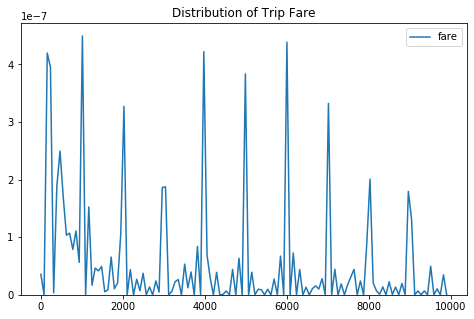

In [16]:
#df_for_model.dropoff_community_area.unique()
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8,5))
sns.kdeplot(df_for_model['fare']).set_title("Distribution of Trip Fare")

Text(0.5, 1.0, 'Distribution of fare amount (log scale)')

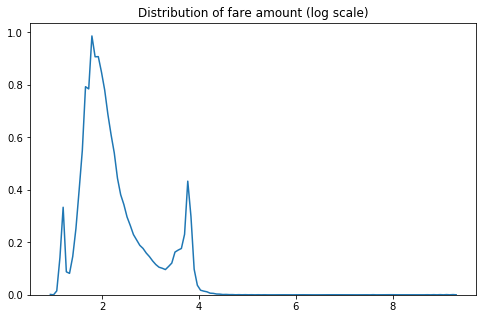

In [17]:
import numpy as np
plt.figure(figsize=(8,5))
sns.kdeplot(np.log(df_for_model['fare'].values)).set_title("Distribution of fare amount (log scale)")

Find the range of the latitude and longitude to make sure all the pickups and drop offs to see, if there are outliners.

In [18]:
print("Range of Pickup Latitude is ", (min(df_for_model['pickup_latitude']),max(df_for_model['pickup_latitude'])))

Range of Pickup Latitude is  (41.660136051, 42.016046492)


In [19]:
print("Range of dropoff Latitude is ", (min(df_for_model['dropoff_latitude']),max(df_for_model['dropoff_latitude'])))

Range of dropoff Latitude is  (41.660136051, 42.021223593)


In [20]:
print("Range of Pickup Longitude is ", (min(df_for_model['pickup_longitude']),max(df_for_model['pickup_longitude'])))

Range of Pickup Longitude is  (-87.913624596, -87.534902901)


In [21]:
print("Range of dropoff Longitude is ", (min(df_for_model['dropoff_longitude']),max(df_for_model['dropoff_longitude'])))

Range of dropoff Longitude is  (-87.913624596, -87.534902901)


Based on the above data, we dont have any outliners

Lets plot the pickups and drop offs points

(-87.54, -87.92)

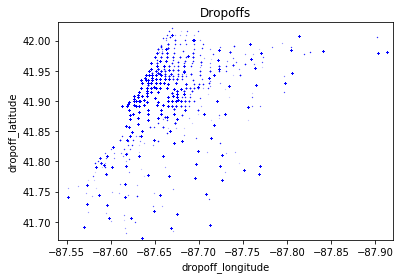

In [22]:
city_long_border = (-87.54, -87.92)
city_lat_border = (41.67, 42.03)

df_for_model.plot(kind='scatter', x='dropoff_longitude', y='dropoff_latitude',
                color='blue', 
                s=.02, alpha=.6)
plt.title("Dropoffs")

plt.ylim(city_lat_border)
plt.xlim(city_long_border)

(-87.54, -87.92)

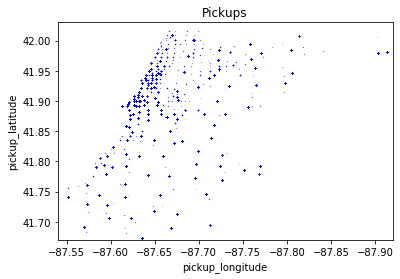

In [23]:
city_long_border = (-87.54, -87.92)
city_lat_border = (41.67, 42.03)

df_for_model.plot(kind='scatter', x='pickup_longitude', y='pickup_latitude',
                color='blue', 
                s=.02, alpha=.6)
plt.title("Pickups")

plt.ylim(city_lat_border)
plt.xlim(city_long_border)

Based on the above data, it is evident that there are certain areas where the pickups and drop offs are more concentrated.  We can get more observations around this, when we plot with full scale data

Lets try to find out, which area have the highest average fare amount

In [24]:
df_for_model['pickup_latitude_round']=df_for_model['pickup_latitude'].apply(lambda x:round(x,2))
df_for_model['pickup_longitude_round']=df_for_model['pickup_longitude'].apply(lambda x:round(x,2))
df_for_model['dropoff_latitude_round']=df_for_model['dropoff_latitude'].apply(lambda x:round(x,2))
df_for_model['dropoff_longitude_round']=df_for_model['dropoff_longitude'].apply(lambda x:round(x,2))
df_for_model.head(10)

,trip_start_timestamp,trip_end_timestamp,trip_seconds,trip_miles,pickup_community_area,dropoff_community_area,fare,payment_type,company,pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude,pickup_latitude_round,pickup_longitude_round,dropoff_latitude_round,dropoff_longitude_round
44787,2020-02-17 08:00:00+00:00,2020-02-17 08:15:00+00:00,1287.0,4.54,14.0,14.0,16.25,Cash,Sun Taxi,41.968069,-87.721559,41.968069,-87.721559,41.97,-87.72,41.97,-87.72
44788,2020-02-05 21:15:00+00:00,2020-02-05 21:15:00+00:00,420.0,1.50,14.0,14.0,7.00,Cash,Taxi Affiliation Services,41.968069,-87.721559,41.968069,-87.721559,41.97,-87.72,41.97,-87.72
44789,2020-02-18 22:00:00+00:00,2020-02-18 22:00:00+00:00,0.0,0.00,14.0,14.0,3.25,Cash,Taxi Affiliation Services,41.968069,-87.721559,41.968069,-87.721559,41.97,-87.72,41.97,-87.72
44790,2020-02-17 08:30:00+00:00,2020-02-17 08:45:00+00:00,996.0,3.65,14.0,14.0,13.25,Credit Card,Sun Taxi,41.968069,-87.721559,41.968069,-87.721559,41.97,-87.72,41.97,-87.72
44791,2020-02-24 03:15:00+00:00,2020-02-24 03:15:00+00:00,180.0,1.30,14.0,14.0,6.25,Cash,Taxi Affiliation Services,41.968069,-87.721559,41.968069,-87.721559,41.97,-87.72,41.97,-87.72
44792,2020-02-15 19:00:00+00:00,2020-02-15 19:30:00+00:00,1860.0,1.40,14.0,14.0,14.50,Unknown,Taxi Affiliation Services,41.968069,-87.721559,41.968069,-87.721559,41.97,-87.72,41.97,-87.72
44793,2020-02-24 14:00:00+00:00,2020-02-24 14:15:00+00:00,407.0,0.96,14.0,14.0,6.00,Cash,Sun Taxi,41.968069,-87.721559,41.968069,-87.721559,41.97,-87.72,41.97,-87.72
44794,2020-02-11 03:15:00+00:00,2020-02-11 03:15:00+00:00,247.0,1.01,14.0,14.0,5.50,Cash,Flash Cab,41.968069,-87.721559,41.968069,-87.721559,41.97,-87.72,41.97,-87.72
44795,2020-02-09 14:30:00+00:00,2020-02-09 14:30:00+00:00,0.0,0.00,14.0,14.0,3.25,Cash,Taxi Affiliation Services,41.968069,-87.721559,41.968069,-87.721559,41.97,-87.72,41.97,-87.72
44796,2020-02-26 05:15:00+00:00,2020-02-26 05:30:00+00:00,840.0,0.00,14.0,14.0,11.00,Credit Card,Taxi Affiliation Services,41.968069,-87.721559,41.968069,-87.721559,41.97,-87.72,41.97,-87.72


In [25]:
pickup_fa_df=df_for_model.groupby(['pickup_latitude_round','pickup_longitude_round'])['fare'].mean().reset_index().rename(columns={'fare':'average_fare'})
pickup_fa_df.sort_values(by=['average_fare'],ascending=False)

,pickup_latitude_round,pickup_longitude_round,average_fare
55,41.79,-87.58,107.270758
225,42.01,-87.90,65.000000
48,41.79,-87.77,59.361975
49,41.79,-87.75,49.296497
19,41.72,-87.57,42.000000
...,...,...,...
124,41.91,-87.80,3.250000
173,41.96,-87.73,3.250000
141,41.93,-87.71,3.250000
161,41.95,-87.75,3.250000


Based on the above numbers, pick ups around Jackson Park, the average fare is higher than other areas of chicago

Lets check the same for drop off location as well

In [26]:
dropoff_fa_df=df_for_model.groupby(['dropoff_latitude_round','dropoff_longitude_round'])['fare'].mean().reset_index().rename(columns={'fare':'average_fare'})
dropoff_fa_df.sort_values(by=['average_fare'],ascending=False)

,dropoff_latitude_round,dropoff_longitude_round,average_fare
133,41.89,-87.77,2282.937500
110,41.86,-87.64,946.942222
238,41.98,-87.82,645.690000
99,41.84,-87.61,251.805000
78,41.82,-87.74,120.500000
...,...,...,...
40,41.76,-87.61,3.250000
200,41.95,-87.75,3.250000
226,41.97,-87.73,3.250000
81,41.82,-87.63,3.250000


Based on the drop off scatter plot and the above numbers, there must few rides that costs in 1000s of dollars, which may represent some bad data, lets find out how many such rides exists and the corresponding details

Text(0.5, 1.0, 'Trip Distance vs Fare Amount')

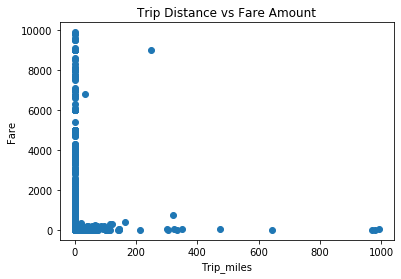

In [27]:
plt.scatter(x=df_for_model['trip_miles'],y=df_for_model['fare'])
plt.xlabel("Trip_miles")
plt.ylabel("Fare")
plt.title("Trip Distance vs Fare Amount")

Based on the above data, lets remove the taxi rides that have irrelevant data like distance of 1000 miles and very low fare and distance of close to 0 miles and very high fare

In [28]:
drop_data3=df_for_model[(df_for_model.fare>400) | (df_for_model.trip_miles>100)].index
df_for_model.drop(drop_data3, inplace=True)

Text(0.5, 1.0, 'Trip Distance vs Fare Amount')

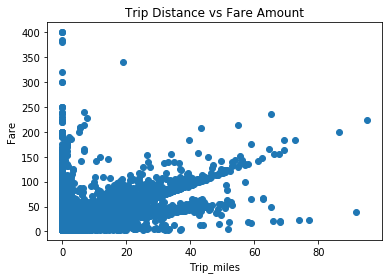

In [29]:
plt.scatter(x=df_for_model['trip_miles'],y=df_for_model['fare'])
plt.xlabel("Trip_miles")
plt.ylabel("Fare")
plt.title("Trip Distance vs Fare Amount")

In [31]:
df_for_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1006517 entries, 44787 to 1122123
Data columns (total 17 columns):
 #   Column                   Non-Null Count    Dtype              
---  ------                   --------------    -----              
 0   trip_start_timestamp     1006517 non-null  datetime64[ns, UTC]
 1   trip_end_timestamp       1006517 non-null  datetime64[ns, UTC]
 2   trip_seconds             1006517 non-null  float64            
 3   trip_miles               1006517 non-null  float64            
 4   pickup_community_area    1006517 non-null  float64            
 5   dropoff_community_area   1006517 non-null  float64            
 6   fare                     1006517 non-null  float64            
 7   payment_type             1006517 non-null  object             
 8   company                  1006517 non-null  object             
 9   pickup_latitude          1006517 non-null  float64            
 10  pickup_longitude         1006517 non-null  float64            

In [35]:
df_for_model['trip_day_of_week']=df_for_model['trip_start_timestamp'].dt.day_name()
df_for_model.head()

,trip_start_timestamp,trip_end_timestamp,trip_seconds,trip_miles,pickup_community_area,dropoff_community_area,fare,payment_type,company,pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude,pickup_latitude_round,pickup_longitude_round,dropoff_latitude_round,dropoff_longitude_round,trip_day_of_week
44787,2020-02-17 08:00:00+00:00,2020-02-17 08:15:00+00:00,1287.0,4.54,14.0,14.0,16.25,Cash,Sun Taxi,41.968069,-87.721559,41.968069,-87.721559,41.97,-87.72,41.97,-87.72,Monday
44788,2020-02-05 21:15:00+00:00,2020-02-05 21:15:00+00:00,420.0,1.50,14.0,14.0,7.00,Cash,Taxi Affiliation Services,41.968069,-87.721559,41.968069,-87.721559,41.97,-87.72,41.97,-87.72,Wednesday
44789,2020-02-18 22:00:00+00:00,2020-02-18 22:00:00+00:00,0.0,0.00,14.0,14.0,3.25,Cash,Taxi Affiliation Services,41.968069,-87.721559,41.968069,-87.721559,41.97,-87.72,41.97,-87.72,Tuesday
44790,2020-02-17 08:30:00+00:00,2020-02-17 08:45:00+00:00,996.0,3.65,14.0,14.0,13.25,Credit Card,Sun Taxi,41.968069,-87.721559,41.968069,-87.721559,41.97,-87.72,41.97,-87.72,Monday
44791,2020-02-24 03:15:00+00:00,2020-02-24 03:15:00+00:00,180.0,1.30,14.0,14.0,6.25,Cash,Taxi Affiliation Services,41.968069,-87.721559,41.968069,-87.721559,41.97,-87.72,41.97,-87.72,Monday


Lets plot the count of the taxi trips on each day of the week

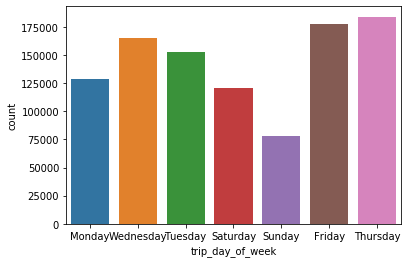

In [37]:
sns.countplot(x='trip_day_of_week',data=df_for_model)

Based on the above graph, it seems more trips are taken on Thursday and Friday.  Usualy the trips are low during weekend

Lets plot similar graph for average fare amount

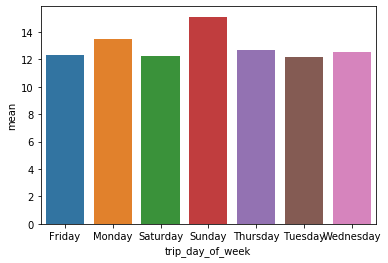

In [49]:
df_mean_day = df_for_model.groupby(df_for_model['trip_day_of_week'])['fare'].agg('mean').reset_index().rename(columns={'fare':'mean'})
sns.barplot(x='trip_day_of_week',y='mean',data=df_mean_day)

As we can see above, even though the # of trips on sunday is less, the average fare is high.  Lets repeat the above two for hourly metrics as well

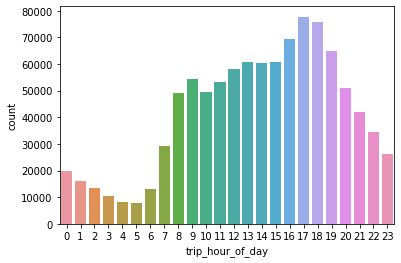

In [51]:
df_for_model['trip_hour_of_day']=df_for_model['trip_start_timestamp'].dt.hour
sns.countplot(x='trip_hour_of_day',data=df_for_model)

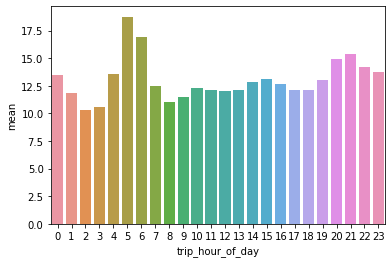

In [52]:
df_mean_hour = df_for_model.groupby(df_for_model['trip_hour_of_day'])['fare'].agg('mean').reset_index().rename(columns={'fare':'mean'})
sns.barplot(x='trip_hour_of_day',y='mean',data=df_mean_hour)

Besed on the above two graphs, we can see the count of tips increases towards evening 5PM and 6 PM.  However the average fare is higher during early morning hours around 5 AM and 6 AM

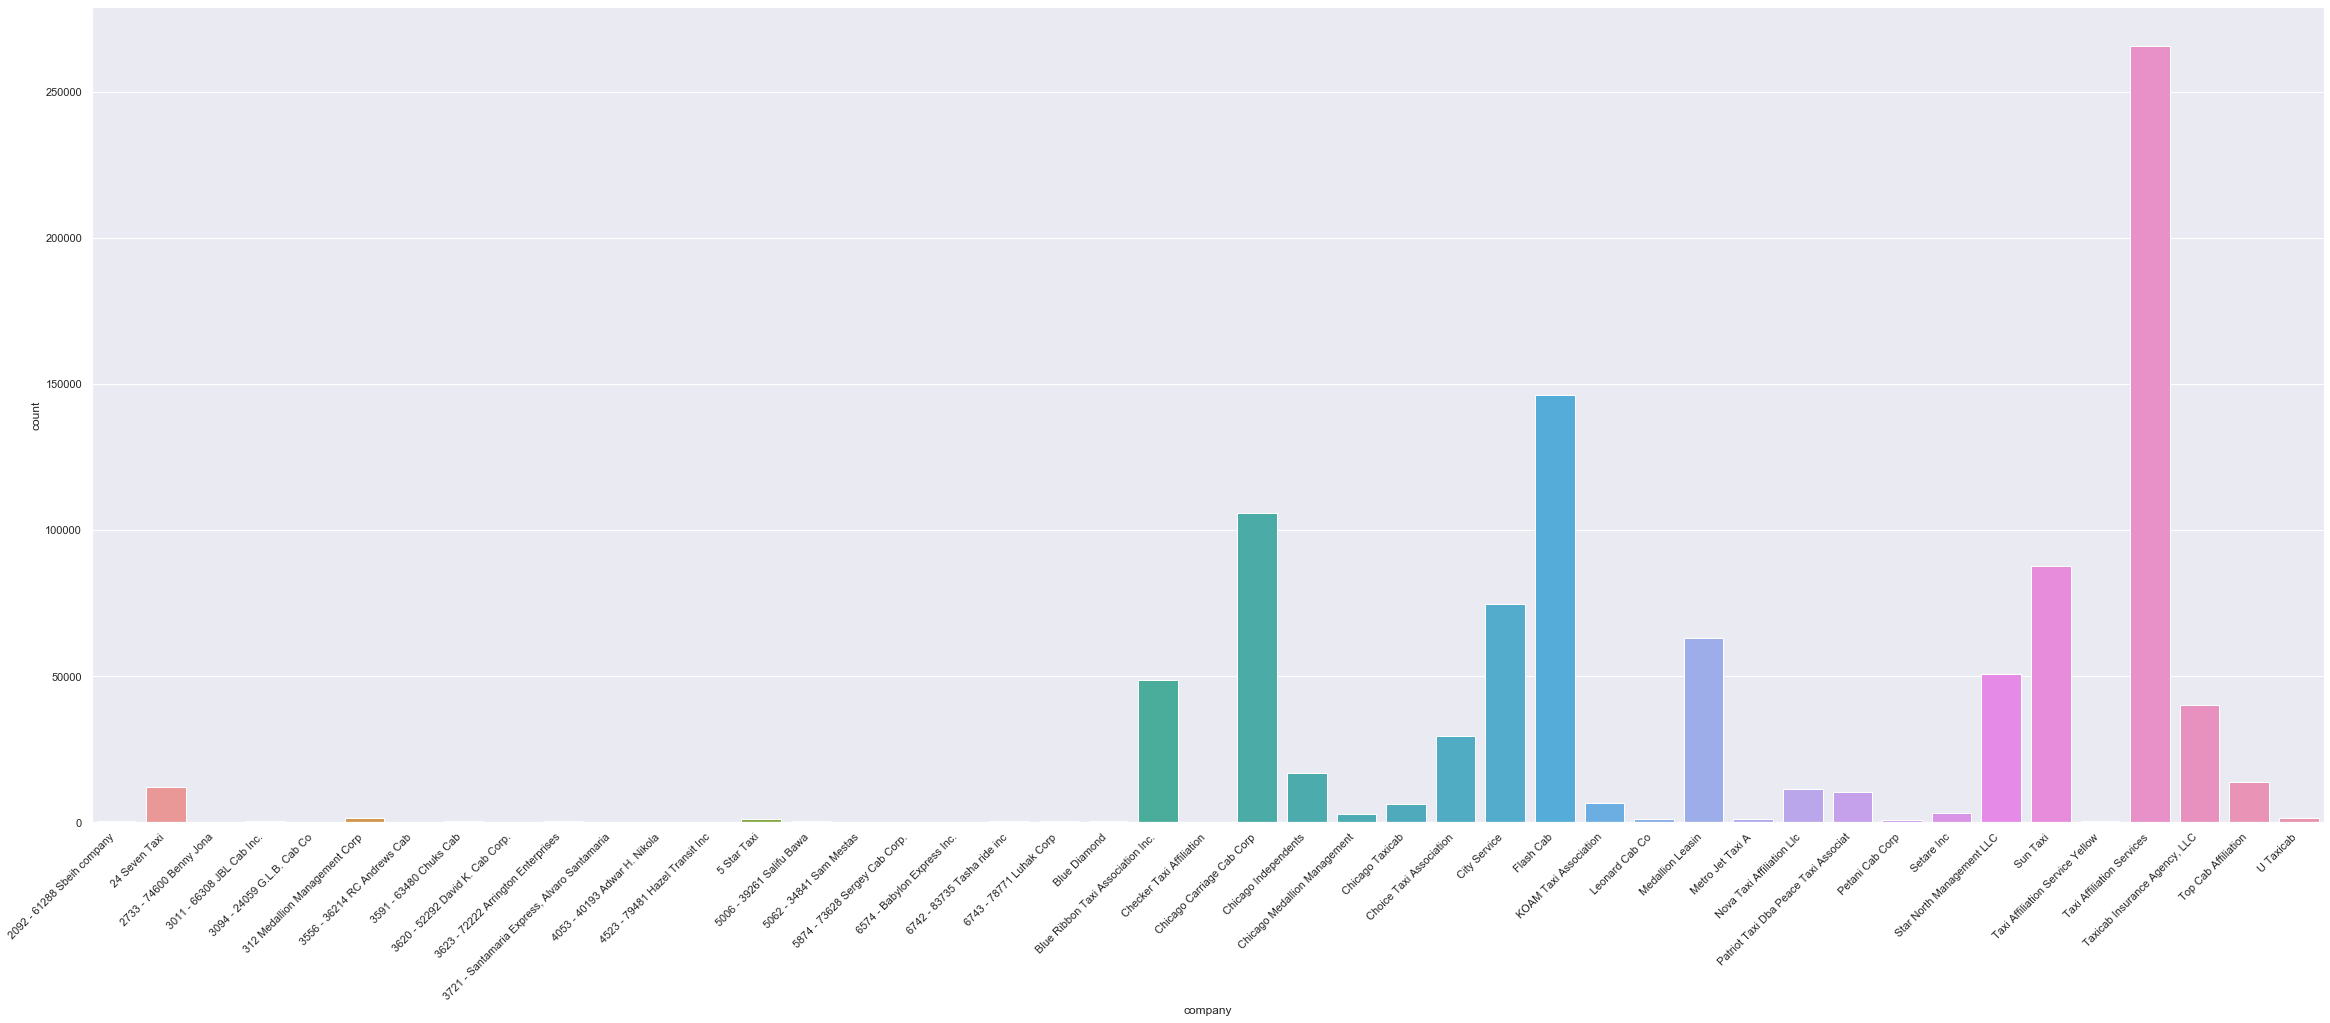

In [64]:
plt.figure(figsize=(40,15))
chart=sns.countplot(x='company',data=df_for_model.sort_values('company'))
chart.set_xticklabels(chart.get_xticklabels(),rotation=45,horizontalalignment='right');

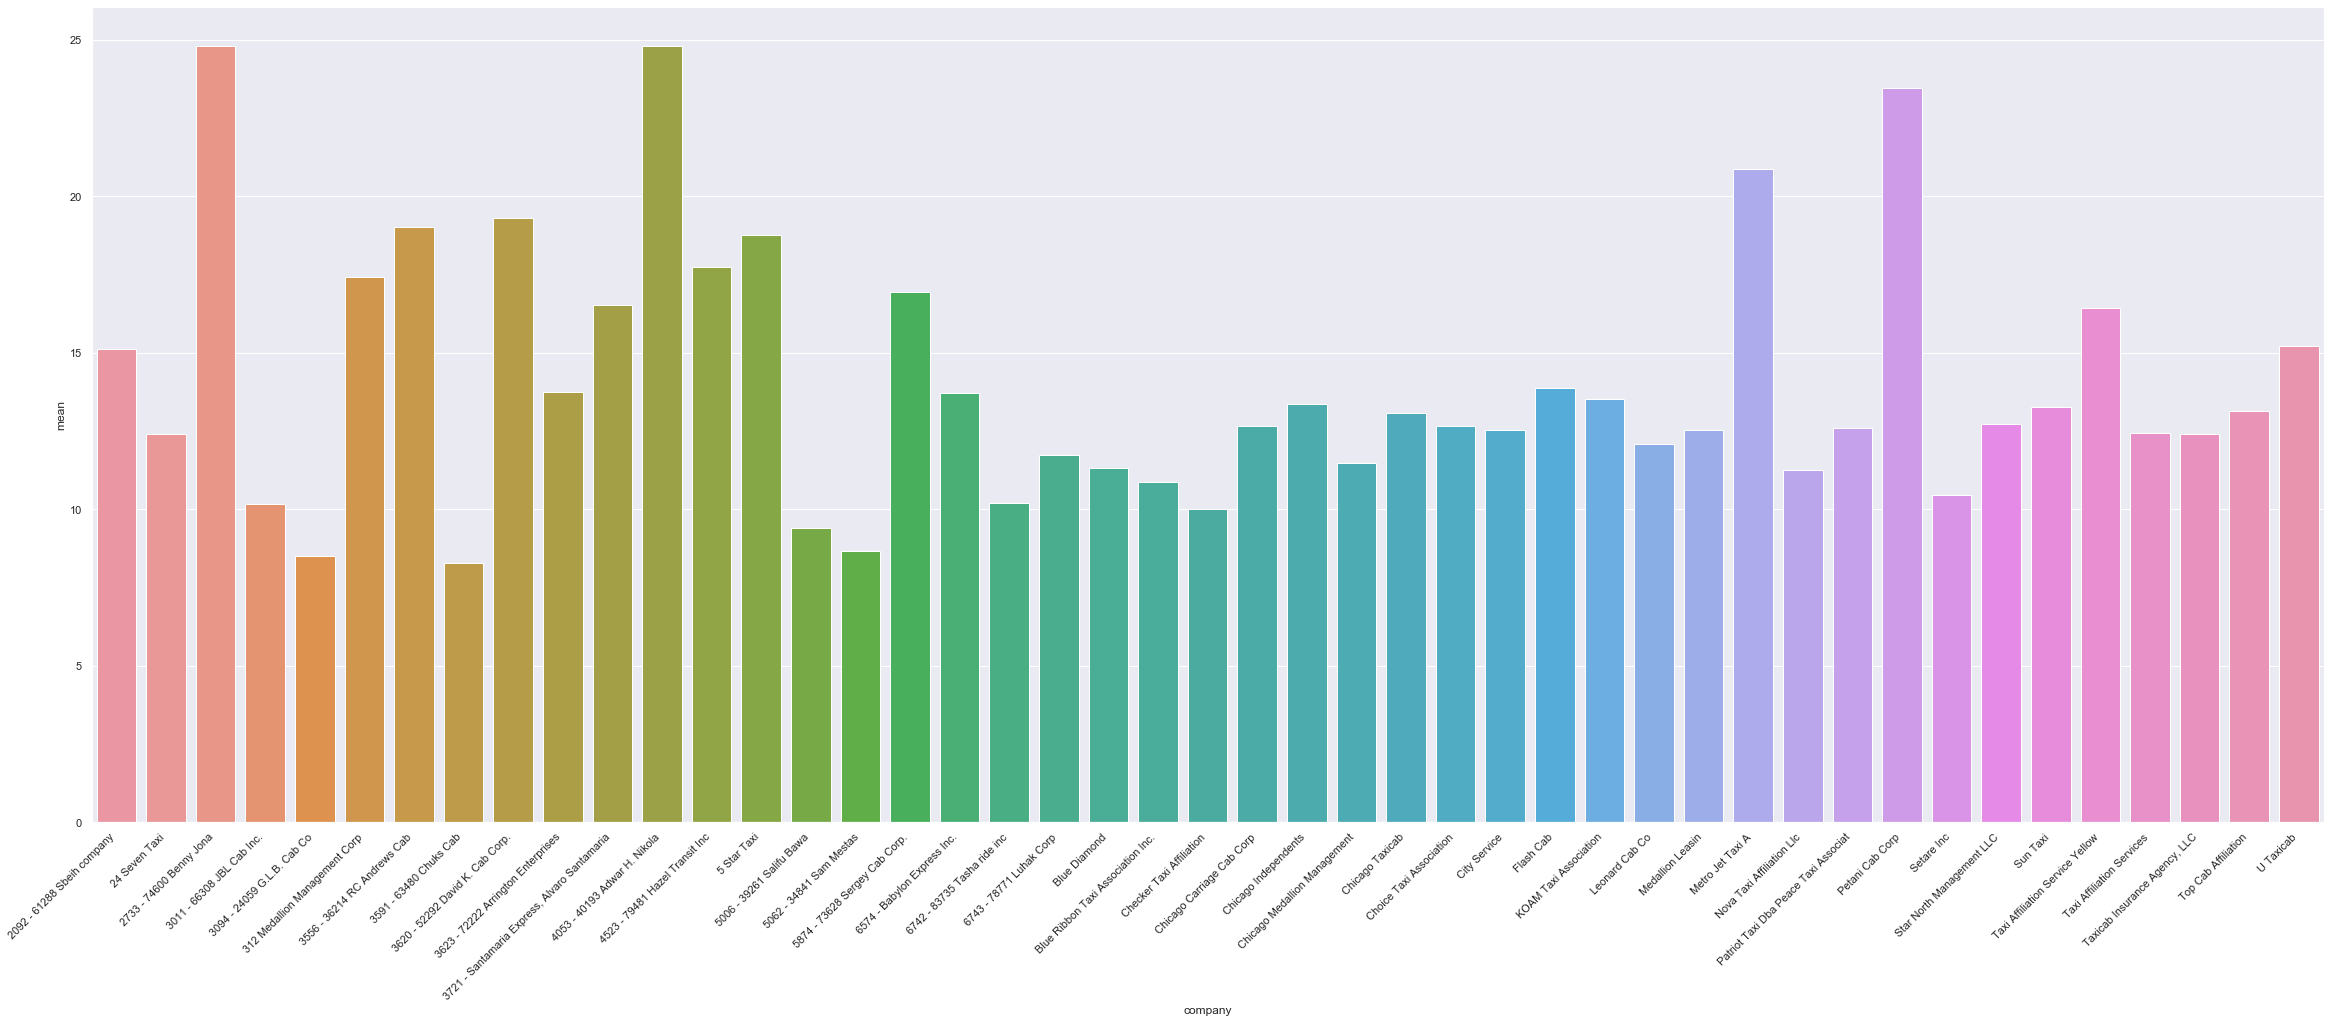

In [65]:
df_mean_company = df_for_model.groupby(df_for_model['company'])['fare'].agg('mean').reset_index().rename(columns={'fare':'mean'})
plt.figure(figsize=(40,15))
comp_chart=sns.barplot(x='company',y='mean',data=df_mean_company.sort_values('company'))
comp_chart.set_xticklabels(comp_chart.get_xticklabels(),rotation=45,horizontalalignment='right');